# Mean and variance estimator applied to real data set

Philipp Schlatter, LSTM FAU 2024

Run in Colab: https://colab.research.google.com/github/pschlatt1/notebooks/blob/main/UA/montecarlo.ipynb

In [5]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  # for Google Colab and interative figures
  !pip install -q ipympl
  from google.colab import output
  output.enable_custom_widget_manager()

In [7]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
import math as mt
from scipy import special
from scipy import stats
from scipy.stats import chi2,t

π = mt.pi

## Real data set

The datafile is also on github.

In [8]:
import h5py
f = h5py.File("bldata.h5", "r")
data = f['DS'][()].T
f.close()
dd = 152.4826  # delta99
ll = 0.0615    # lstart
ut = 0.0362    # utau          
yp = 24.4753   # vertical position


<IPython.core.display.Javascript object>


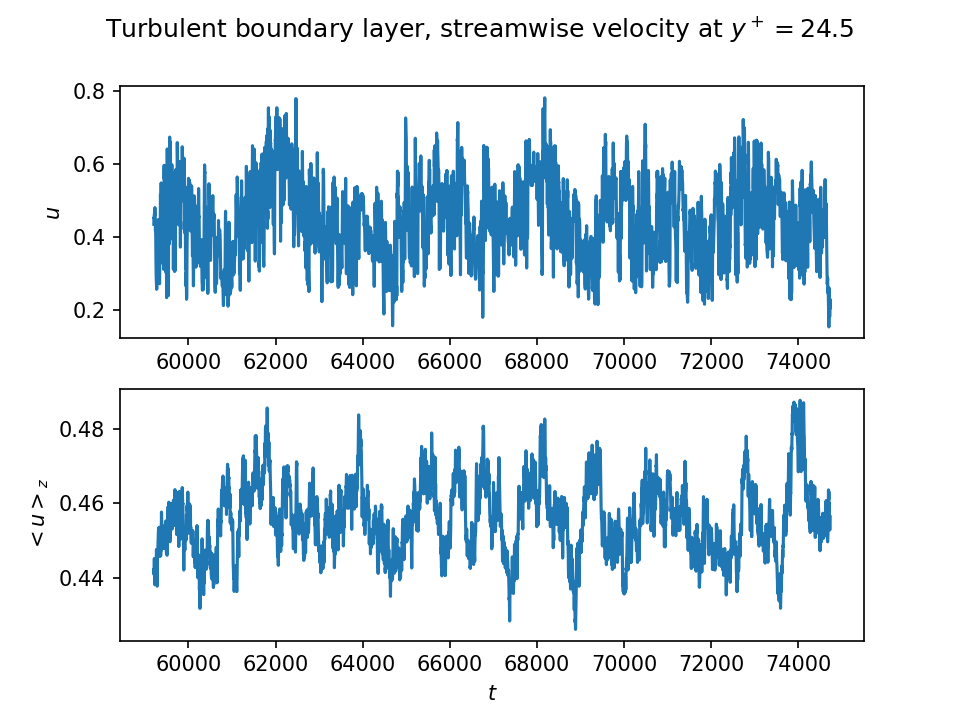

In [13]:
fig,(ax1,ax2) = plt.subplots(2,1)
fig.suptitle(r'Turbulent boundary layer, streamwise velocity at $y^+=24.5$')
ax1.plot(data[:,0],data[:,1])
ax1.set_ylabel('$u$')
ax2.plot(data[:,0],data[:,2])
ax2.set_ylabel('$<u>_z$')
ax2.set_xlabel('$t$')

plt.show()

In [14]:
# estimators for one point:
np.mean(data[:,1]),np.std(data[:,1]),np.var(data[:,1])

(0.4469648783602918, 0.10601383175310897, 0.011238932522976494)

In [15]:
# estimators for the spanwise averaged data:
np.mean(data[:,2]),np.std(data[:,2]),np.var(data[:,2])

(0.45602095302341583, 0.00979247191540663, 9.589250621402757e-05)

## Hands-on:

1. Get some basic statistics of the data, using Python functions.
2. Compute the integral time scale.
3. Batch the data to make them independent. Test some batch sizes and plot the batch means.
4. Compute the distribution of the batch means and batch variance.
5. Compute the error bars for mean and variance.

(The full analysis of this data set could be a good project suggestion)

In [16]:
import statsmodels.api as sm

In [17]:
N=data[:,2].size
Rxx = sm.tsa.acf(data[:,2],nlags=N)
dt=data[:,0]-data[0,0]

<IPython.core.display.Javascript object>


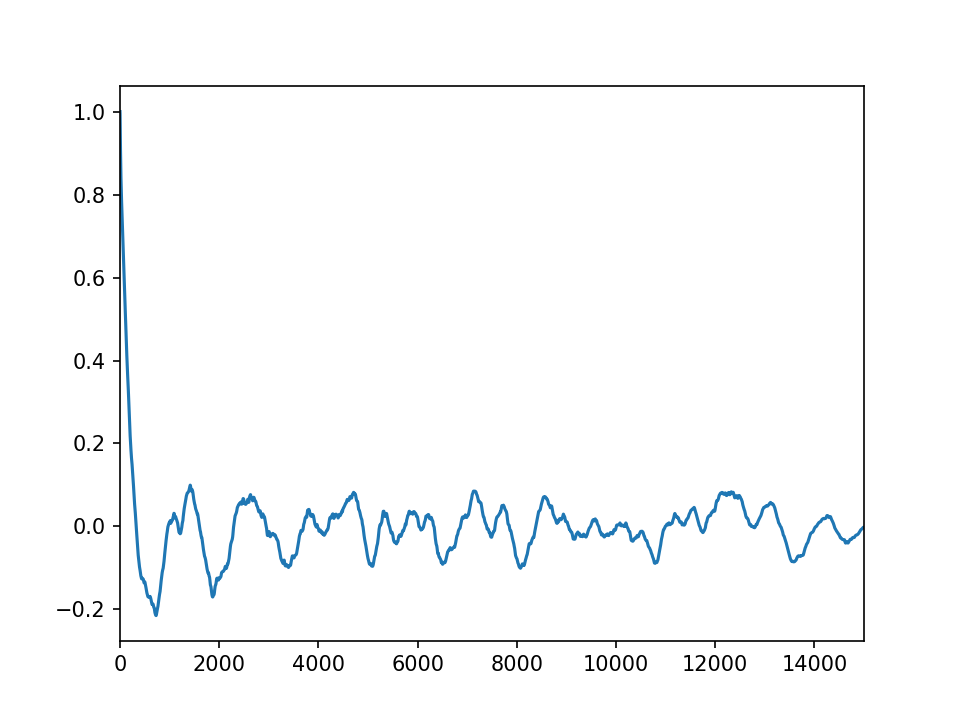

(0.0, 15000.0)

In [18]:
plt.figure()
plt.plot(dt,Rxx)
plt.xlim([0,15000])

In [19]:
lam=np.zeros(N)
for i in range(N):
    lam[i] = np.trapz(Rxx[:i],dt[:i])

<IPython.core.display.Javascript object>


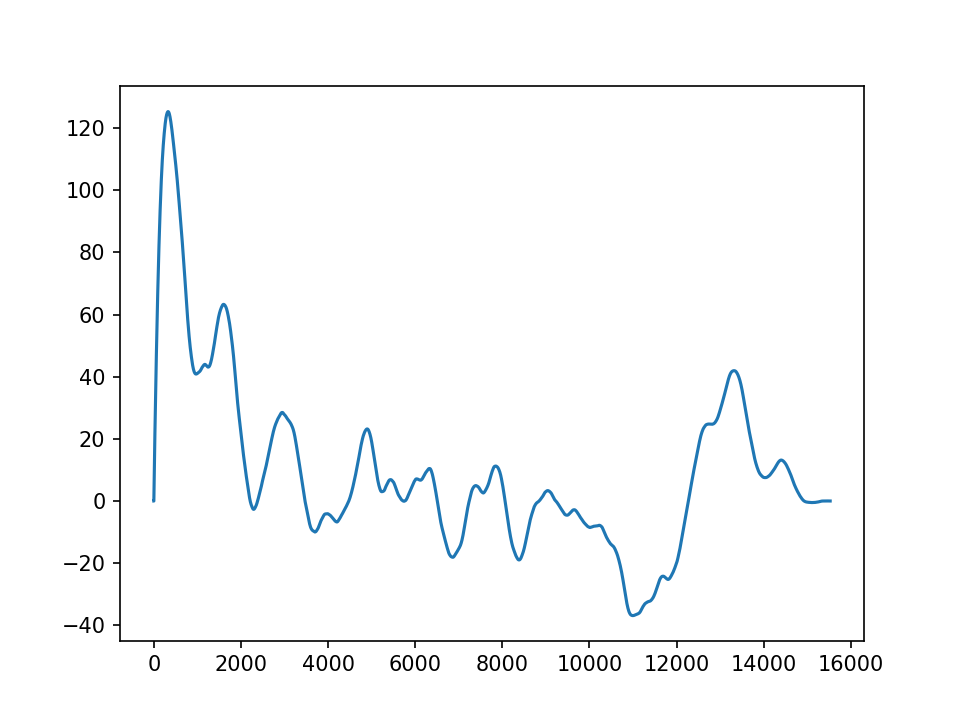

In [21]:
plt.figure()
plt.plot(dt,lam)

From these plots, one could assume that the data is correlated over about 100 samples (corresponding to about 80 time units).

In [47]:
dt[100]

79.99999999810098